In [40]:
#Libraries import
import numpy as np
import math
import matplotlib.pyplot as plt
import timeit
from scipy.optimize import curve_fit
from decimal import Decimal, getcontext
from IPython.display import display

In [4]:
#List of functions that should be obsearved
def const_fun(v):
    return 1

def sum_fun(v):
    return sum(v)

def product_fun(v):
    return math.prod(v)

def polynomial_fun(v):
    getcontext().prec = 10
    x_value = Decimal('1.5')
    res=0
    for i, coeff in enumerate(v):
        res=+ Decimal(coeff.item()) * (x_value**i)
    return res

def polynomial_horner_fun(v):
    poly = 0
    for i in range(len(v), 0, -1):
        x = 1.5
        poly = v[i - 1] + poly * x
    return poly

def bubble_sort_fun(v):  
    has_swapped = True  
    total_iteration = 0  
    while(has_swapped):  
        has_swapped = False  
        for i in range(len(v) - total_iteration - 1):  
            if v[i] > v[i+1]:  
                v[i], v[i+1] = v[i+1], v[i]  
                has_swapped = True  
        total_iteration += 1   
    return v
                
def quick_sort_fun(v):
    if len(v) <= 1:
        return v
    else:
        pivot = v[0]
        left = [x for x in v[1:] if x < pivot]
        right = [x for x in v[1:] if x >= pivot]
        return quick_sort_fun(left) + [pivot] + quick_sort_fun(right)

def timsort_fun(v):
    return sorted(v.copy())

In [5]:
fun_list = [const_fun, sum_fun, product_fun,
           polynomial_fun, polynomial_horner_fun, bubble_sort_fun,
           quick_sort_fun, timsort_fun]

In [6]:
def execution_time(function, k, n):
    timeseries = []
    for i in range(n):
        t = 0
        for x in range(k):
            v = np.random.randint(0,50,i)
            start = timeit.default_timer()
            function(v)
            end = timeit.default_timer()
            t += (end - start)
        timeseries.append(t / k)
    return timeseries

In [7]:
k=5
const_time = execution_time(fun_list[0], k, 2000)
sum_time = execution_time(fun_list[1], k, 2000)
product_time = execution_time(fun_list[2], k, 2000)

C:\Users\alika\AppData\Local\Temp\ipykernel_13572\661358303.py:8: RuntimeWarning: overflow encountered in long_scalars
  return math.prod(v)


In [8]:
polynomial_time = execution_time(fun_list[3], k, 2000)
horners_polynomial_time = execution_time(fun_list[4], k, 2000)

C:\Users\alika\AppData\Local\Temp\ipykernel_13572\661358303.py:22: RuntimeWarning: overflow encountered in double_scalars
  poly = v[i - 1] + poly * x


In [9]:
bubble_time = execution_time(fun_list[5], k, 500) #small number used to obtain result faster

In [25]:
quick_time = execution_time(fun_list[6], k, 2000)
timsort_time = execution_time(fun_list[7], k, 2000)

In [ ]:
#for fun in fun_list:
#    print(fun)
#    plt.figure(figsize=(10,5))
#    plt.plot(execution_time(fun,5,2000))
#    plt.ylabel('Time (seconds)')
#    plt.xlabel('N')
#    plt.legend()
#    plt.show()

In [11]:
# Theoretical complexities functions
def o_n(x, a, b):
    return a*x + b

def o_nlogn(x, a, b):
    return a*x*np.log(x) + b

def o_n2(x, a, b):
    return a*(x**2) + b

def o_n3(x, a, b):
    return a*(x**3) + b

In [12]:
def plot_times(times, title, complexity=None, xlabel='n', ylabel='Average Execution Time (seconds)'):
    
    n_values = np.arange(1, len(times) + 1)
    
    fitted = None
    func = None
    
    if complexity == 'n':
        func = o_n
    elif complexity == 'nlogn':
        func = o_nlogn
    elif complexity == 'n2':
        func = o_n2
    elif complexity == 'n3':
        func = o_n3
        
    if func:
        params, _ = curve_fit(func, n_values, times)
        fitted = func(n_values, *params)
    
    plt.figure(figsize=(10, 5))
    plt.plot(n_values, times)
    
    if fitted is not None:
        plt.plot(n_values, fitted, label=f'Fitted {complexity}', linestyle='-', color='red')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

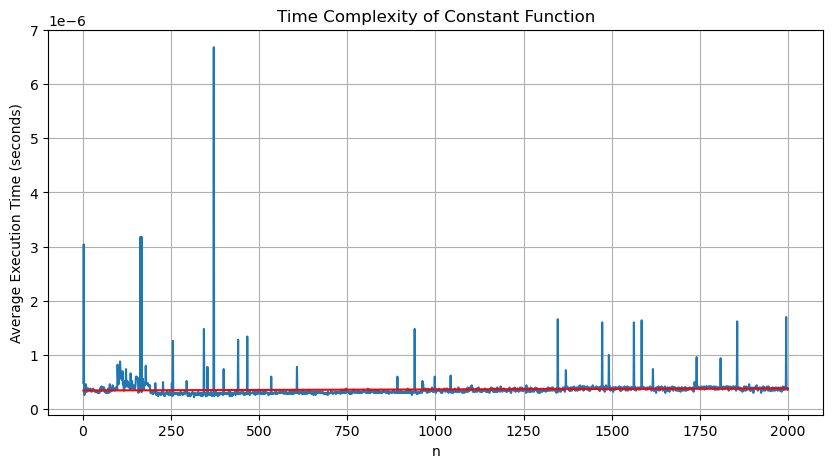

In [13]:
#Plot results for each function 
plot_times(const_time, complexity = 'n', title = 'Time Complexity of Constant Function')

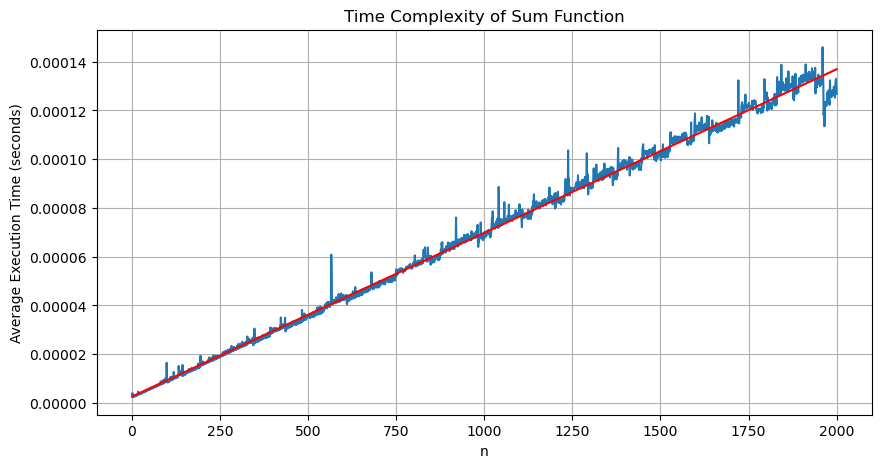

In [14]:
plot_times(sum_time, complexity = 'n', title = 'Time Complexity of Sum Function')

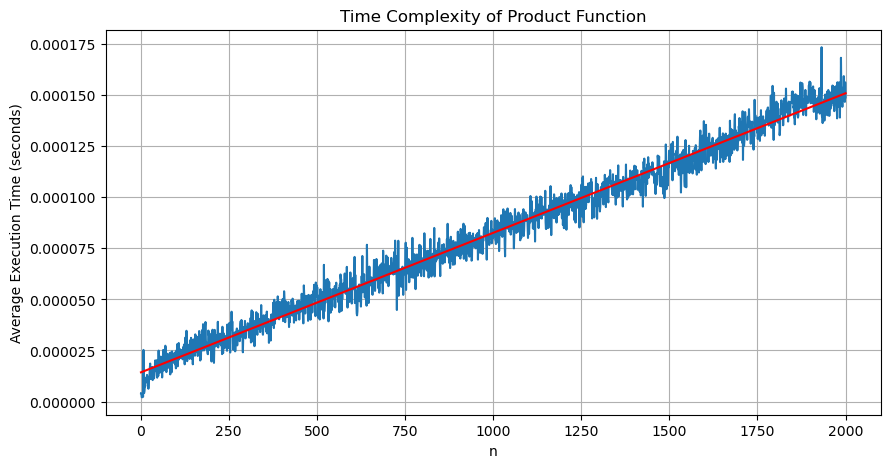

In [15]:
plot_times(product_time, complexity = 'n', title = 'Time Complexity of Product Function')

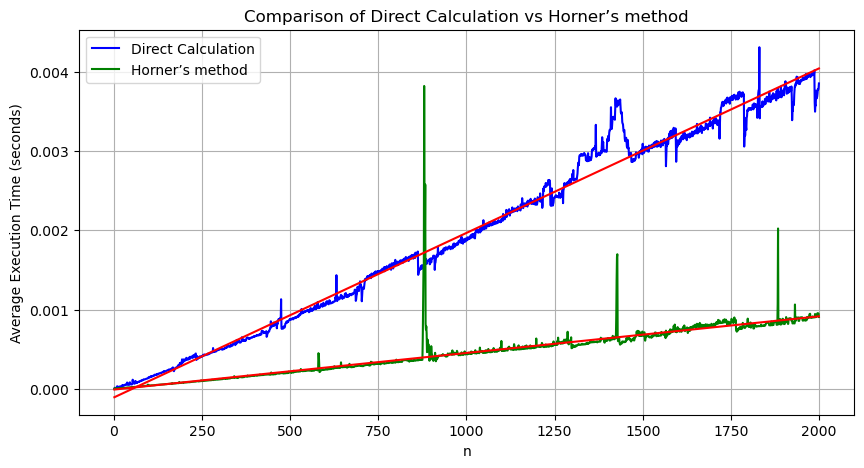

In [17]:
#Plot two different ways to calculate results 
direct_times = polynomial_time
horner_times = horners_polynomial_time

n_values = np.arange(1, len(direct_times) + 1)

params, _ = curve_fit(o_n, n_values, direct_times)
fitted_direct = o_n(n_values, *params)

params, _ = curve_fit(o_n, n_values, horner_times)
fitted_horner = o_n(n_values, *params)

plt.figure(figsize=(10, 5))

plt.plot(range(1, 2001), direct_times, label='Direct Calculation', color='blue')
plt.plot(range(1, 2001), horner_times, label='Horner’s method', color='green')
plt.plot(n_values, fitted_direct, linestyle='-', color='red')
plt.plot(n_values, fitted_horner, linestyle='-', color='red')
plt.xlabel('n')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Comparison of Direct Calculation vs Horner’s method')
plt.grid(True)
plt.legend()
plt.savefig("plot.png", bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()

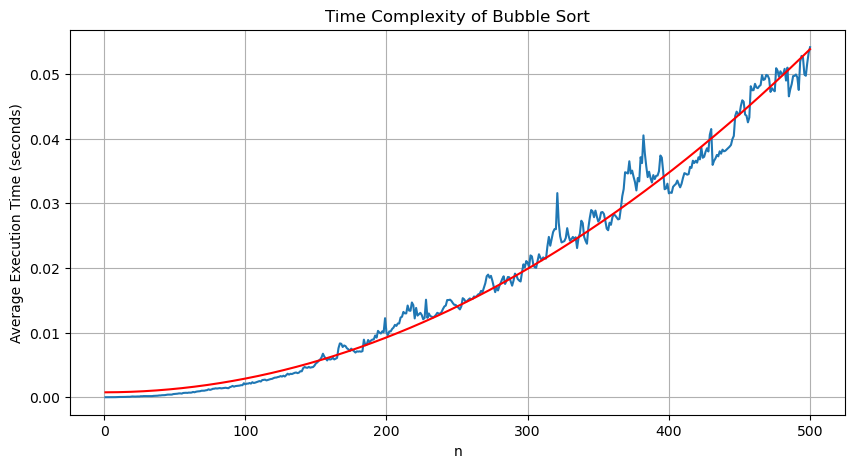

In [19]:
plot_times(bubble_time, complexity = 'n2', title = 'Time Complexity of Bubble Sort')

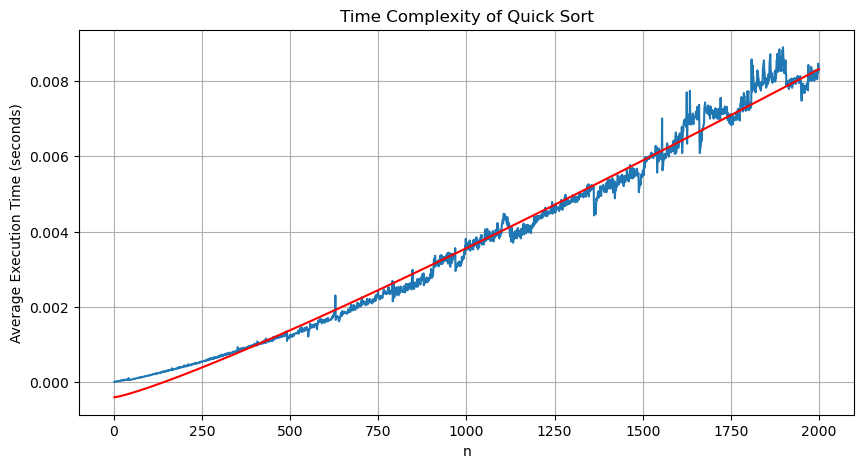

In [23]:
plot_times(quick_time, complexity = 'nlogn', title = 'Time Complexity of Quick Sort')

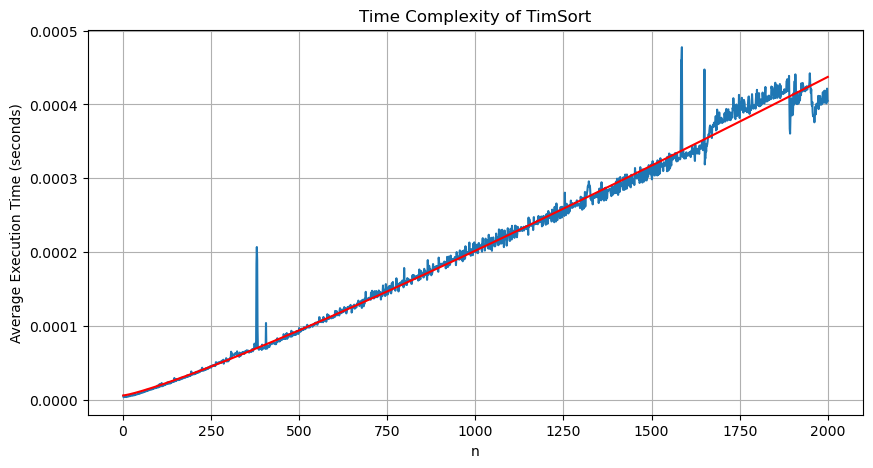

In [26]:
plot_times(timsort_time, complexity = 'nlogn', title = 'Time Complexity of TimSort')

In [34]:
#Function to calculate matrices product 
def matrix_time_execution(k):
    timeseries = []
    for y in range(1, k):
        t = 0
        for x in range(5):
            matrix1 = np.random.random((y, y))
            matrix2 = np.random.random((y, y))
            start = timeit.default_timer()
            matrix1 @ matrix2
            end = timeit.default_timer()
            t += (end - start)
        timeseries.append(t / k)
    return timeseries

In [37]:
k=500 #small number used to obtain result faster
matrix_times = matrix_time_execution(k)

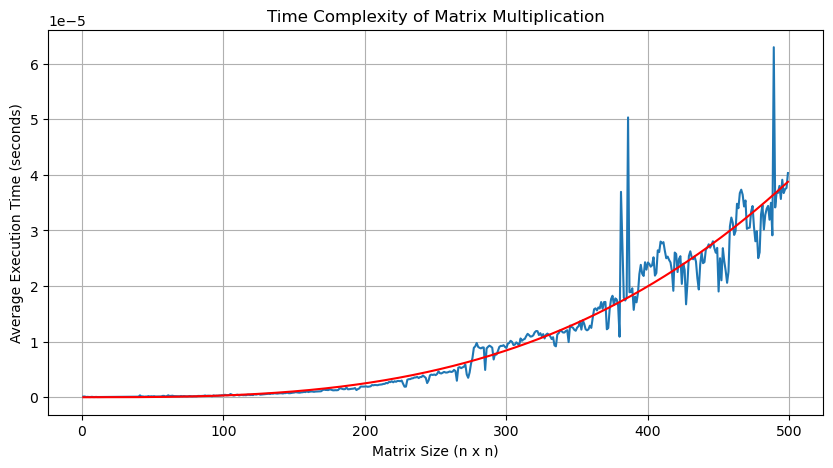

In [39]:
#Plot graph for matrices multiplication result 
n_values = np.arange(1, k)

params, _ = curve_fit(o_n3, n_values, matrix_times)
fitted = o_n3(n_values, *params)
    
plt.figure(figsize=(10, 5))    
plt.plot(n_values, matrix_times)
plt.plot(n_values, fitted, linestyle='-', color='red')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Time Complexity of Matrix Multiplication')
plt.grid(True)
plt.savefig("plot.png", bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()